In [1]:
import mysql
import mysql.connector

In [2]:
#Classe de conexao ao banco de dados mysql
class bancoMysql():
    def __init__(self):
        global cnx
        
    def abreConexao(self):
        import mysql

        #configuração do servidor
        config = {
            'user': 'root',
            'password': '12345678',
            'host': 'localhost',
            'database': 'eleicoes',
            'raise_on_warnings': True,
        }    
        #conectando na base
        self.cnx = mysql.connector.connect(**config)
        
    def executaQueryGenerica(self,cnx,sqlQuery,parametros):
        #cria cursor para execução e parse
        cursor = self.cnx.cursor()
        cursor.execute(sqlQuery,parametros)
        self.cnx.commit()
        cursor.close()
        return True;        
    
    def getAllRows(self,sql,parametros):
        cursor = self.cnx.cursor(dictionary=True)
        query = (sql)
        cursor.execute(query,parametros)
        arrDados = cursor.fetchall()
        cursor.close()
        return arrDados

    def fechaConexao(self):
        self.cnx.close()   

In [3]:
objBanco = bancoMysql()
objBanco.abreConexao()

In [4]:
sql = """
    SELECT
        x.dt_cadastro_f,
        CONCAT(SUBSTR(x.dt_cadastro_f,7,2),'-',SUBSTR(x.dt_cadastro_f,5,2),'-',SUBSTR(x.dt_cadastro_f,1,4),' ',SUBSTR(x.dt_cadastro_f,9,2),'hs') ano_dia_hora_f,
        CONCAT(SUBSTR(x.dt_cadastro_f,7,2),'d ',SUBSTR(x.dt_cadastro_f,9,2),'h') dia_hora_f,
        COUNT(x.id_twitter) as qtd
    FROM
        (
        SELECT
            date_format(T1.dt_cadastro, '%Y%m%d%H') dt_cadastro_f,
            SUBSTR(t1.twitter,56,19) AS ID_TWITTER
        FROM 
            eleicoes.tb_twitter t1
        WHERE
            date_format(T1.dt_cadastro, '%Y%m%d%H') >= '2018081700'
        ) x
    GROUP BY
        x.dt_cadastro_f,
        dia_hora_f
    ORDER BY
        1
"""
parametros = ()

In [5]:
arrDados = objBanco.getAllRows(sql,parametros)
objBanco.fechaConexao()

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


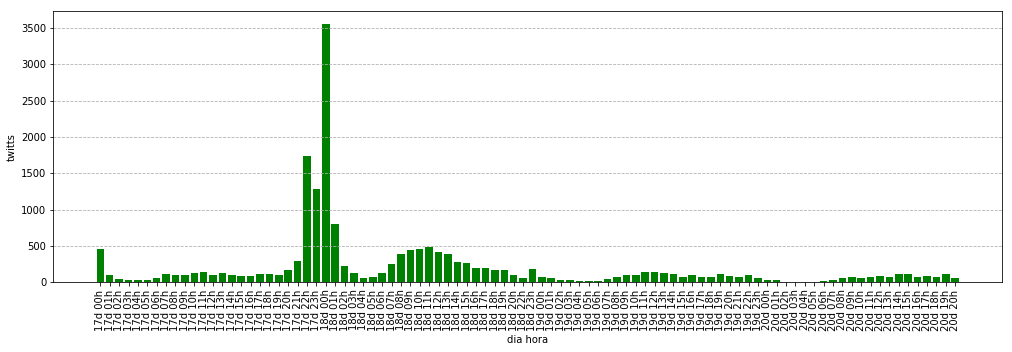

In [7]:
gY = []
gX = []
for rowDados in arrDados:
    gY.append(rowDados['qtd'])
    gX.append(rowDados['dia_hora_f'])

axes = plt.subplots(1, figsize=(17,5))

plt.xlabel('dia hora')
plt.ylabel('twitts')
plt.bar(gX, gY, color = 'g')
plt.xticks(rotation=90)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()